In [2]:
include("driver.jl")

testReaction

In [1]:
using Catalyst

In [6]:
convert(ODESystem, SimpleReactions.simplePRxn)

Model simplePRxn with 10 equations
States (10):
  L(t)
  K(t)
  P(t)
  A(t)
⋮
Parameters (11):
  ka1
  kb1
  kcat1
  ka2
⋮

In [5]:
pRxn = SimpleReactions.simplePRxn

Model simplePRxn
States (10):
  L(t)
  K(t)
  P(t)
  A(t)
⋮
Parameters (11):
  ka1
  kb1
  kcat1
  ka2
⋮

In [11]:
substrates = substoichmat(pRxn)

10×13 Matrix{Int64}:
 1  0  0  0  0  0  0  1  0  0  0  0  0
 1  0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  1  0  0
 0  0  0  0  1  1  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  1
 0  0  0  0  0  0  1  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  1  0  0  0

In [9]:
products = prodstoichmat(pRxn)

10×13 Matrix{Int64}:
 0  1  0  0  0  0  0  0  1  0  0  0  1
 0  1  1  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  1
 0  0  0  0  1  0  0  0  0  0  0  0  0
 0  0  1  0  1  0  0  0  0  1  0  1  0
 0  0  0  1  0  0  1  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  1  0  0  1  1  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  0

In [12]:
stoichVectors = products - substrates

10×13 Matrix{Int64}:
 -1   1   0   0   0   0   0  -1   1   0   0   0   1
 -1   1   1   0   0  -1   1   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0  -1   1   1
  0   0   0  -1   1   0   0   0   0   0   0   0   0
  0   0   1  -1   1   0   0   0   0   1  -1   1   0
  0   0   0   1  -1  -1   1   0   0   0   0   0   0
  1  -1  -1   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   1  -1  -1
  0   0   0   0   0   1  -1  -1   1   1   0   0   0
  0   0   0   0   0   0   0   1  -1  -1   0   0   0

In [33]:
using LinearAlgebra

In [20]:
reactioncomplexes(pRxn)[2]

13×13 Matrix{Int64}:
 -1   1   0   0   0   0   0   0   0   0   0   0   0
  1  -1  -1   0   0   0   0   0   0   0   0   0   0
  0   0   1   0   0   0   0   0   0   0   0   0   0
  0   0   0  -1   1   0   0   0   0   0   0   0   0
  0   0   0   1  -1   0   0   0   0   0   0   0   0
  0   0   0   0   0  -1   1   0   0   0   0   0   0
  0   0   0   0   0   1  -1   0   0   0   0   0   0
  0   0   0   0   0   0   0  -1   1   0   0   0   0
  0   0   0   0   0   0   0   1  -1  -1   0   0   0
  0   0   0   0   0   0   0   0   0   1   0   0   0
  0   0   0   0   0   0   0   0   0   0  -1   1   0
  0   0   0   0   0   0   0   0   0   0   1  -1  -1
  0   0   0   0   0   0   0   0   0   0   0   0   1

In [22]:
complexGraph = SimpleDiGraph(reactioncomplexes(pRxn)[2])

{13, 26} directed simple Int64 graph

In [23]:
using TikzGraphs

┌ Warning: Module Graphs with build ID fafbfcfd-d53c-1849-0000-07a83b830083 is missing from the cache.
│ This may mean Graphs [86223c79-3864-5bf0-83f7-82e725a168b6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1758


┌ Warning: Module Graphs with build ID fafbfcfd-d53c-1849-0000-07a83b830083 is missing from the cache.
│ This may mean Graphs [86223c79-3864-5bf0-83f7-82e725a168b6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1758


┌ Warning: Module Plots with build ID fafbfcfd-d5e9-e72f-0000-07ba3a567b97 is missing from the cache.
│ This may mean Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1758


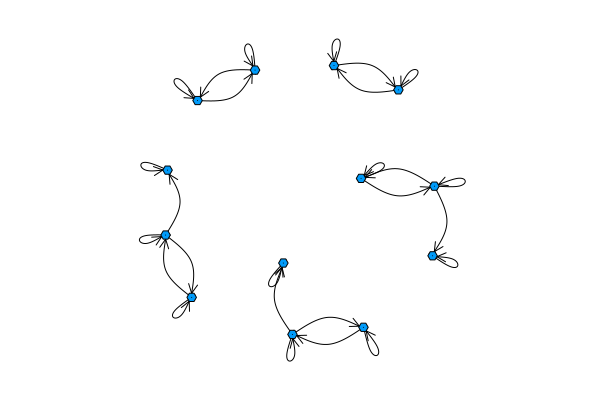

In [26]:
using GraphRecipes
graphplot(complexGraph)

In [29]:
nondirected = SimpleGraph(complexGraph)

{13, 21} undirected simple Int64 graph

In [30]:
connected_components(nondirected)

5-element Vector{Vector{Int64}}:
 [1, 2, 3]
 [4, 5]
 [6, 7]
 [8, 9, 10]
 [11, 12, 13]